<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/KerasDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.sitepoint.com/keras-digit-recognition-tutorial/

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


5


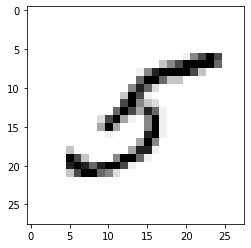

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()


In [ ]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train[:image_index + 1])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


In [ ]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train/255
x_test = x_test/255

In [ ]:
#from keras.utils import to_categorical
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))


In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10
469/469 [==============================] - 117s 219ms/step - loss: 0.5180 - accuracy: 0.8403 - val_loss: 0.0530 - val_accuracy: 0.9822
Epoch 2/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0914 - accuracy: 0.9735 - val_loss: 0.0391 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 4/10
469/469 [==============================] - 102s 218ms/step - loss: 0.0530 - accuracy: 0.9848 - val_loss: 0.0319 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 6/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 102s 218ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0290 -

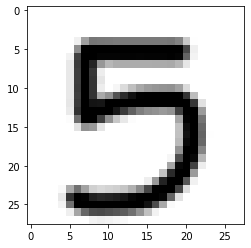

In [ ]:
import imageio

import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
# reshape the image
gray = gray.reshape(1, img_rows, img_cols, 1)

# normalize image
gray /= 255


In [ ]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())


5
